## Locally Weighted Regression (LOWESS)

### 1. Loading the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [7]:
dfx  = pd.read_csv('Dataset/weightedX.csv')
dfy  = pd.read_csv('Dataset/weightedY.csv')

In [8]:
X = dfx.values
Y = dfy.values

In [11]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


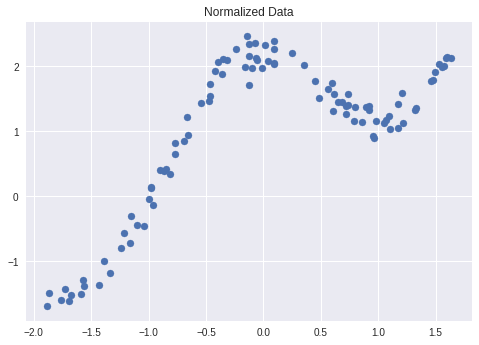

In [17]:
# Normalize the data
X = (X-X.mean())/X.std()
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

### 2. Find W (mxm) diagonal matrix

In [18]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [26]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
W = getW(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


### 3. Making Predictions

In [38]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    qx = np.mat([query_x,1])
    W = getW(qx,X_,tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [43]:
theta,pred = predict(X,Y,1.0,1.0)

In [44]:
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


### 4. Analyze the effect of Tau (Bandwidth Parameter)

In [61]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred)
    XO = np.array(X)
    YO = np.array(Y)
    plt.title("Tau is %.2f"%tau)
    plt.scatter(XO,YO,label="Training Data")
    plt.scatter(X_test,Y_test,color="red",label="Prediction")
    plt.legend()
    plt.show()

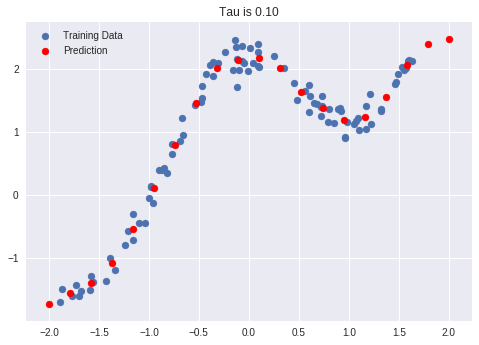

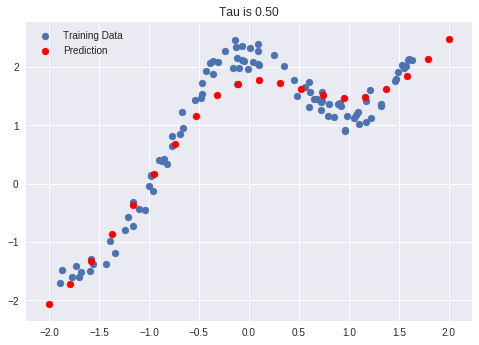

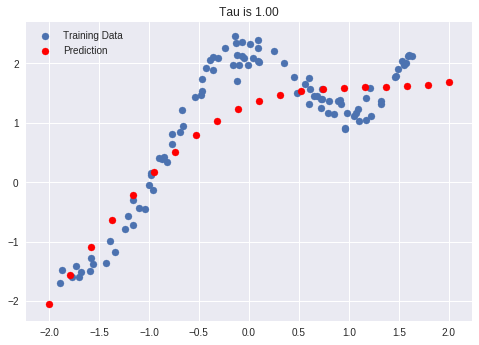

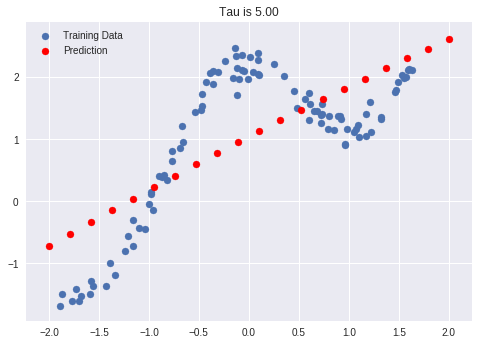

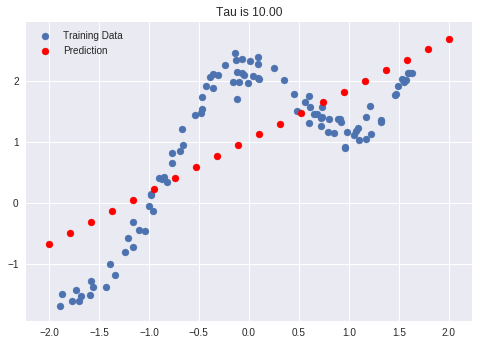

In [62]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)